In [112]:
"""
Created on THU Dec 29 2022
@author: kristin waters
"""

#import pandas library and provide alias name as pd
import pandas as pd
from datetime import datetime, timedelta
from pandas import DataFrame

source_file = '/Users/ksarah/Documents/Source/DataScience/FireReporting/datasets/boston_fire_incidents_2014_dec2022.csv'
incident_code_file = '/Users/ksarah/Documents/Source/DataScience/FireReporting/datasets/incident-type-code-list.csv'

# Data from: https://www.kaggle.com/shivamb/netflix-shows
fire_data = pd.read_csv(source_file, dtype={'zip': 'str', 'alarm_time': 'str'})
code_data = pd.read_csv(incident_code_file)

# Convert timestamps
fire_data['alarm_date'] = pd.to_datetime(fire_data['alarm_date'], format="%Y-%m-%d")
fire_data['alarm_time'] = pd.to_datetime(fire_data['alarm_time'], format="%H:%M:%S").dt.time
fire_data = fire_data.rename(columns={"incident_type": "code"})


# Merge codes with fire data
combined = fire_data.merge(code_data, how='left').drop(columns=['category', 'descript', 'street_prefix', 'xstreet_suffix', 'xstreet_prefix', 'xstreet_name', 'xstreet_suffix', 'xstreet_type', 'street_suffix', 'address_2', 'category'])
combined['year'] = pd.DatetimeIndex(combined['alarm_date']).year
combined['neighborhood'] = combined['neighborhood'].astype('str')

combined.head()

/Users/ksarah/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3433: DtypeWarning: Columns (4,8,9,10,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,incident_number,exposure_number,alarm_date,alarm_time,code,incident_description,estimated_property_loss,estimated_content_loss,district,city_section,neighborhood,zip,property_use,property_description,street_number,street_name,street_type,grp,year
0,22-0088239,0,2022-12-24,00:23:12,511,Lock-out,0,0,09,RX,Roxbury,02119,963,Street or road in commercial area,80,THORNTON,ST,51.0,2022
1,22-0088240,0,2022-12-24,00:25:04,553,Public service,0,0,06,SB,South Boston,02127,429,Multifamily dwelling,401,OLD COLONY,AVE,55.0,2022
2,22-0088241,0,2022-12-24,00:25:22,113,"Cooking fire, confined to container",0,0,11,BR,Allston-Brighton,02135,429,Multifamily dwelling,21,SUTHERLAND,RD,11.0,2022
3,22-0088245,0,2022-12-24,00:40:52,714,"Central station, malicious false alarm",0,0,04,BO,Boston,02118,400,"Residential, Other",345,HARRISON,AVE,71.0,2022
4,22-0088246,0,2022-12-24,00:43:39,554,Assist invalid,0,0,03,BO,Boston,02111,429,Multifamily dwelling,80,MASON,ST,55.0,2022


In [118]:
import numpy as np

neighborhood = "Charlestown"
incident_code = "553"

mask = (
    (fire_data.neighborhood == neighborhood)
    & (fire_data.code == incident_code)
    & (fire_data.alarm_date >= "2014-01-01")
    & (fire_data.alarm_date <= "2022-12-31")
)
filtered_data = fire_data.loc[mask, :]

filtered_data.head()

,incident_number,exposure_number,alarm_date,alarm_time,code,incident_description,estimated_property_loss,estimated_content_loss,district,city_section,...,street_number,street_prefix,street_name,street_suffix,street_type,address_2,xstreet_prefix,xstreet_name,xstreet_suffix,xstreet_type
5,22-0088247,0,2022-12-24,00:51:01,553,Public service,0,0,03,CH,...,NaN,NaN,INTERSTATE 93,N,NaN,: @NB I93 NO TOBIN BR EXIT,NaN,NaN,NaN,NaN
160,22-0087946,0,2022-12-23,03:49:02,553,Public service,0,0,03,CH,...,50,NaN,HOOD PARK,NaN,DR,NaN,NaN,NaN,NaN,NaN
291,22-0088139,0,2022-12-23,18:06:01,553,Public service,0,0,03,CH,...,17,NaN,POLK,NaN,ST,NaN,NaN,NaN,NaN,NaN
298,22-0088153,0,2022-12-23,18:40:13,553,Public service,0,0,03,CH,...,11,NaN,MONUMENT,NaN,ST,NaN,NaN,NaN,NaN,NaN
710,22-0087427,0,2022-12-20,19:42:09,553,Public service,0,0,03,CH,...,98,NaN,MEDFORD,NaN,ST,NaN,NaN,NaN,NaN,NaN


In [110]:
# Extract incidents in 2022 only
f_data22 = combined.query('"2022-01-01" <= alarm_date <= "2022-12-31"')
f_data22.head()

,incident_number,exposure_number,alarm_date,alarm_time,code,incident_description,estimated_property_loss,estimated_content_loss,district,city_section,neighborhood,zip,property_use,property_description,street_number,street_name,street_type,grp,year
0,22-0088239,0,2022-12-24,00:23:12,511,Lock-out,0,0,09,RX,Roxbury,02119,963,Street or road in commercial area,80,THORNTON,ST,51.0,2022
1,22-0088240,0,2022-12-24,00:25:04,553,Public service,0,0,06,SB,South Boston,02127,429,Multifamily dwelling,401,OLD COLONY,AVE,55.0,2022
2,22-0088241,0,2022-12-24,00:25:22,113,"Cooking fire, confined to container",0,0,11,BR,Allston-Brighton,02135,429,Multifamily dwelling,21,SUTHERLAND,RD,11.0,2022
3,22-0088245,0,2022-12-24,00:40:52,714,"Central station, malicious false alarm",0,0,04,BO,Boston,02118,400,"Residential, Other",345,HARRISON,AVE,71.0,2022
4,22-0088246,0,2022-12-24,00:43:39,554,Assist invalid,0,0,03,BO,Boston,02111,429,Multifamily dwelling,80,MASON,ST,55.0,2022


In [58]:
f_data = f_data22.groupby(['alarm_date', 'city_section'], as_index=False).incident_number.count()
f_data.columns = ['alarm_date', 'city_section', 'count']
f_data_pivot = f_data.pivot(index='alarm_date', columns='city_section', values='count').rename_axis(None, axis=1).reset_index()
f_data_pivot.fillna(0, inplace = True)
f_data_pivot.head()

,alarm_date,BO,BR,CH,DO,EB,HI,HP,JP,MT,RS,RX,SB,WR
0,2022-01-01,43.0,12.0,2.0,27.0,6.0,0.0,9.0,6.0,8.0,4.0,30.0,4.0,3.0
1,2022-01-02,18.0,6.0,2.0,22.0,6.0,0.0,2.0,5.0,6.0,3.0,12.0,9.0,3.0
2,2022-01-03,31.0,8.0,4.0,20.0,7.0,0.0,3.0,3.0,3.0,2.0,18.0,7.0,5.0
3,2022-01-04,27.0,15.0,6.0,28.0,7.0,0.0,2.0,5.0,4.0,6.0,15.0,8.0,4.0
4,2022-01-05,44.0,8.0,6.0,13.0,12.0,0.0,6.0,5.0,2.0,4.0,16.0,13.0,6.0


In [61]:
f_data = f_data22.groupby(['alarm_date', 'code', 'city_section'], as_index=False).incident_number.count()
f_data.columns = ['alarm_date', 'code' ,'city_section', 'count']
f_data.head()

,alarm_date,code,city_section,count
0,2022-01-01,111,EB,1
1,2022-01-01,113,BO,3
2,2022-01-01,113,DO,1
3,2022-01-01,113,JP,1
4,2022-01-01,113,MT,1


In [91]:
f_data = combined.groupby(['year'], as_index=False).incident_number.count()
f_data.columns = ['year', 'count']

print(f_data.to_string())

   year  count
0  2014  41430
1  2015  46676
2  2016  47083
3  2017  47311
4  2018  50300
5  2019  49666
6  2020  44900
7  2021  49151
8  2022  53507


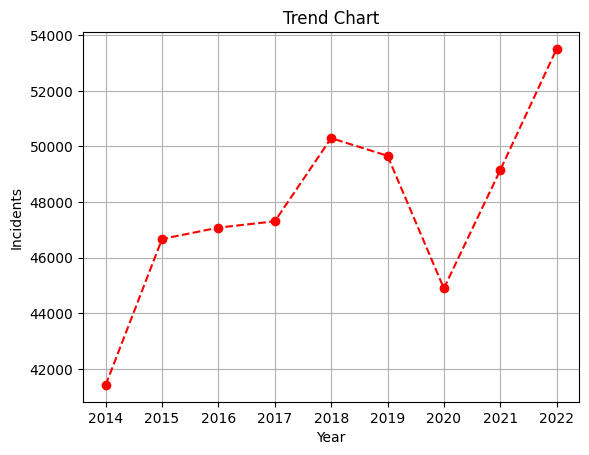

In [108]:
import matplotlib.pyplot as plt

#  Declare a chart with one Axis
fig, ax = plt.subplots()

plt.plot(f_data['year'], f_data['count'], marker='o', linestyle='--', color='r', label='Square') 

ax.set_ylabel('Incidents') 
ax.set_xlabel('Year')
ax.set_title("Trend Chart")
#fig.set_size_inches(14.5, 6.5)
plt.grid()

In [123]:
# INITIALIZE APPLICATION
source_file = '/Users/ksarah/Documents/Source/DataScience/FireReporting/datasets/boston_fire_incidents_2014_dec2022.csv'
incident_code_file = '/Users/ksarah/Documents/Source/DataScience/FireReporting/datasets/incident-type-code-list.csv'

fire_data = pd.read_csv(source_file)
code_data = pd.read_csv(incident_code_file)

# Convert timestamps
fire_data['alarm_date'] = pd.to_datetime(
    fire_data['alarm_date'], format="%Y-%m-%d")
fire_data['alarm_time'] = pd.to_datetime(
    fire_data['alarm_time'], format="%H:%M:%S").dt.time

# Data Cleanup
fire_data = fire_data.rename(columns={"incident_type": "code"})
fire_data['neighborhood'] = fire_data['neighborhood'].astype('str')
fire_data['code'] = fire_data['code'].astype('str')
fire_data['month'] = pd.DatetimeIndex(fire_data['alarm_date']).month
fire_data['year'] = pd.DatetimeIndex(fire_data['alarm_date']).year

# Merge codes with fire data
fire_data = fire_data.merge(code_data, how='left').drop(columns=['category', 'descript', 'street_prefix', 'xstreet_suffix',
                                                                 'xstreet_prefix', 'xstreet_name', 'xstreet_suffix', 'xstreet_type', 'street_suffix', 'address_2', 'category'])

# data = combined.query("grp == '11' and neighborhood == 'CH'")
#fire_data.sort_values("alarm_date", inplace=True)

fire_data.head()

/Users/ksarah/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3433: DtypeWarning: Columns (4,8,9,10,11,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,incident_number,exposure_number,alarm_date,alarm_time,code,incident_description,estimated_property_loss,estimated_content_loss,district,city_section,neighborhood,zip,property_use,property_description,street_number,street_name,street_type,month,year,grp
0,22-0088239,0,2022-12-24,00:23:12,511,Lock-out,0,0,09,RX,Roxbury,2119,963,Street or road in commercial area,80,THORNTON,ST,12,2022,51.0
1,22-0088240,0,2022-12-24,00:25:04,553,Public service,0,0,06,SB,South Boston,2127,429,Multifamily dwelling,401,OLD COLONY,AVE,12,2022,55.0
2,22-0088241,0,2022-12-24,00:25:22,113,"Cooking fire, confined to container",0,0,11,BR,Allston-Brighton,2135,429,Multifamily dwelling,21,SUTHERLAND,RD,12,2022,11.0
3,22-0088245,0,2022-12-24,00:40:52,714,"Central station, malicious false alarm",0,0,04,BO,Boston,2118,400,"Residential, Other",345,HARRISON,AVE,12,2022,71.0
4,22-0088246,0,2022-12-24,00:43:39,554,Assist invalid,0,0,03,BO,Boston,2111,429,Multifamily dwelling,80,MASON,ST,12,2022,55.0


In [125]:
import pandas as pd
from pandas_profiling import ProfileReport

profile = ProfileReport(fire_data, title="Pandas Profiling Report")
profile.to_file("fire_data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]